In [2]:
def func(x):
    return x

In [242]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 


In [6]:
plt.plot(x, func)

NameError: name 'x' is not defined

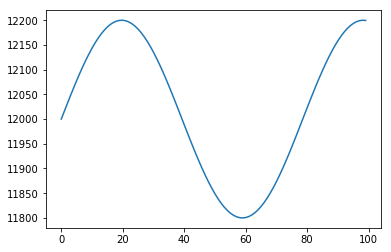

In [243]:
x = np.arange(0, 100)
plt.plot(x, func(x))
plt.show()

In [345]:
def running_mean(x, N):
    return np.convolve(x, np.ones((N,))/N, mode='valid')[(N-1):]
def running_mean1(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)
def norm(x):
    return np.random.normal(x, 10)
def der(x, func):
    return scipy.misc.derivative(x, func, 1)
def norm_sin(x):
    return norm(np.sin(x))
def mean_norm_sin(x):
    return running_mean(norm_sin(x), 5)

In [430]:
import scipy.misc
import scipy.stats

C:\Users\ozavorot\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RankWarning: Polyfit may be poorly conditioned
  after removing the cwd from sys.path.


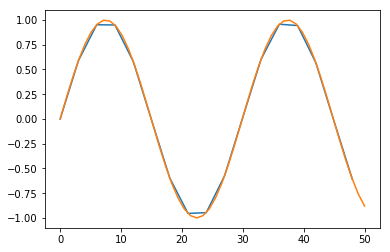

In [436]:
func = lambda x: np.sin(0.21*x)
x = np.array(np.arange(0, 50, 3))
f = func(x)
p = np.poly1d(np.polyfit(x, f, 20))
xx = np.linspace(0, 50)
pp = p(xx)
plt.plot(x, f)
plt.plot(xx, pp)
plt.show()

[ 11979.121  12012.179  12026.129  12010.141  12039.984  12059.711
  12045.173  12045.23   12085.635  12083.196  12092.629  12088.9    12109.03
  12131.381  12124.237  12145.025  12149.145  12147.27   12166.187
  12152.584  12144.33   12179.654  12162.457  12197.593  12190.328
  12184.693  12186.817  12184.324  12207.315  12206.712  12199.252
  12189.118  12194.809  12185.71   12195.445  12206.077  12189.83
  12191.617  12196.13   12201.18   12177.752  12163.269  12177.969
  12168.488  12158.521  12146.394  12157.151  12148.056  12138.794
  12106.92   12107.424  12108.863  12108.416  12086.308  12112.026
  12070.774  12082.878  12030.992  12050.489  12035.67   12032.726
  12014.038  12002.885  12003.132  11992.714  11992.17   11957.433
  11954.233  11933.22   11925.36   11928.191  11904.904  11907.817
  11887.374  11883.996  11879.896  11888.741  11903.245  11864.192
  11845.643  11840.422  11838.71   11831.005  11826.085  11829.275
  11812.907  11799.225  11812.768  11799.168  11794.0

C:\Users\ozavorot\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RankWarning: Polyfit may be poorly conditioned
  


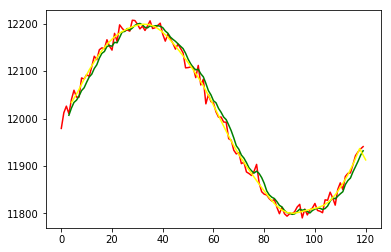

In [496]:
import pandas as pd
x = pd.DataFrame(np.arange(120))
func = lambda x: 12000 + 200*np.sin(0.05*x)
norm_func = lambda x: norm(func(x))
fc = func(x)

#fc = fc / mean
nm = norm_func(x)
#среднее последних транзакций??
nm_for_dr = lambda x: nm[int(x)]
rolling_window = 4
rm = pd.DataFrame(nm).rolling(rolling_window).mean()
print(nm.reshape(120))
pp = np.polyfit([xx for xx in x[0]], nm.reshape(nm.shape[0]), 20)
p = np.poly1d(pp)
xx = np.linspace(rolling_window, 120)
ppp = p(xx)
#plt.plot(x, fc, color='BLUE')
plt.plot(x, nm, color='RED')
plt.plot(x, rm, color='GREEN')
plt.plot(xx, ppp, color='YELLOW')
plt.show()

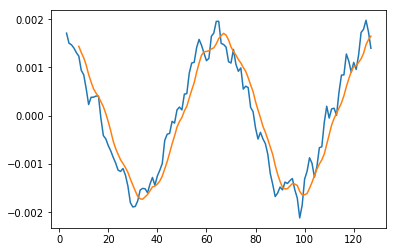

In [396]:
dr = [scipy.misc.derivative(lambda x: rm[0][x], i) for i in range(1,129)]
dr_df = pd.DataFrame(dr)
dr_rm = dr_df.rolling(6).mean()
plt.plot(dr)
plt.plot(dr_rm)
plt.show()

In [355]:
dr[120]

17.462955719925958

C:\Users\ozavorot\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':


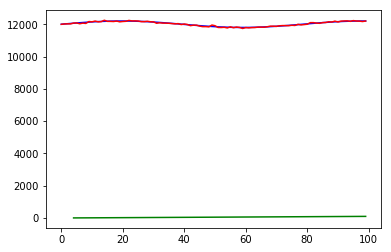

In [256]:
x = np.arange(0,100)
#Функция цены без нормализации
func = lambda x: 12000 + 200*np.sin(0.08*x)
#Нормализованная цена
norm_func = lambda x: norm(func(x))
fc = func(x)
nm = norm_func(x)
mean_num = 7
rm = pd.rolling_mean(x, 5) #running_mean(nm, mean_num)
#for i in range(mean_num):
#    rm[-i] = rm[-mean_num]
rm_func = lambda x: rm[int(x)]
#производная
#dr = [scipy.misc.derivative(norm_func, i) for i in x]
rm_dr = [scipy.misc.derivative(rm_func, i) for i in x[:-1]]
rm_dr.append(rm_dr[-1])
plt.plot(x, fc, color='BLUE')
plt.plot(x, nm, color='RED')
plt.plot(x, rm, color='GREEN')
#plt.plot(x, running_mean(nm, 2), color='RED')
#plt.plot(x, der(norm_sin, x), color='GREEN')
#plt.plot(x, der(mean_norm_sin, x), color='PURPLE')
plt.show()

In [190]:
np.set_printoptions(precision=3, suppress=True)
print(nm)

[ 11989.29   11998.504  12031.647  12051.588  12079.338  12151.979
  12100.769  12065.971  12063.031  12146.731  12134.847  12174.973
  12152.768  12186.612  12151.186  12215.855  12229.664  12177.371
  12200.56   12209.918  12156.571  12173.123  12140.915  12074.92
  12156.382  12130.975  12097.548  12075.368  12103.634  12032.383
  12058.661  12024.375  11991.185  11989.008  11943.758  11927.368
  11959.009  11852.82   11875.276  11875.847  11874.963  11842.795
  11829.624  11825.361  11844.852  11799.809  11815.585  11841.349
  11908.895  11847.257  11799.99   11799.027  11852.678  11809.047
  11866.459  11845.019  11842.41   11911.841  11896.054  11887.93
  11946.466  11915.031  11983.413  12024.456  12043.229  12041.793
  12044.989  12082.598  12104.131  12136.811  12145.614  12167.716
  12152.707  12207.557  12136.048  12073.24   12164.208  12164.439
  12165.099  12113.553  12119.265  12132.33   12180.779  12146.29
  12224.289  12150.862  12163.705  12083.467  12109.496  12127.86

In [226]:
print(rm_dr)

[44.973633608201453, 51.922096727550525, 15.853287193929646, 22.403427912586267, 25.000986550350717, 21.552738576644515, 16.346576717977769, 12.677559380393177, 11.059625405659062, 9.7946284522340648, 4.8468272471245655, 1.763866235806745, -2.1346728723392516, -1.9316345882989481, -3.0935112214447145, -8.2050060348001352, -11.997501044082128, -15.036321643551673, -11.837081959643001, -10.102533612103798, -12.500830836716887, -12.161847208183644, -11.403338264255581, -17.401902453518233, -16.003025334476661, -19.564932772729662, -26.045645756998056, -20.808681326895567, -21.883539678457964, -19.988834337731532, -12.952837386523242, -18.4600464588666, -17.402240989199527, -11.428863662816184, -15.843983973022659, -15.083897362289463, -14.378334296286994, -15.920847969518036, -11.237597511878448, -13.645613469975615, -13.264377829937075, -6.8546669457518874, -6.9995884696336361, -9.8646509261743631, -2.1747327149114426, 7.3743823765571506, 7.9068214651451854, 7.8765084439673956, 10.676238

ValueError: x and y must have same first dimension, but have shapes (115, 1) and (95,)

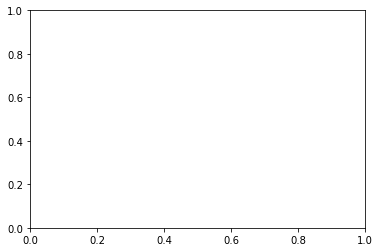

In [497]:
#plt.plot(x, dr, color='PURPLE')
plt.plot(x[5:], rm_dr[5:], color='RED')
plt.plot(running_mean(rm_dr, 5)[5:])
plt.show()

In [542]:
[round(np.random.normal(i+1000, 1)) for i in np.arange(20)]

[998,
 1000,
 1002,
 1003,
 1005,
 1007,
 1005,
 1007,
 1008,
 1012,
 1010,
 1013,
 1012,
 1013,
 1014,
 1012,
 1015,
 1016,
 1017,
 1021]

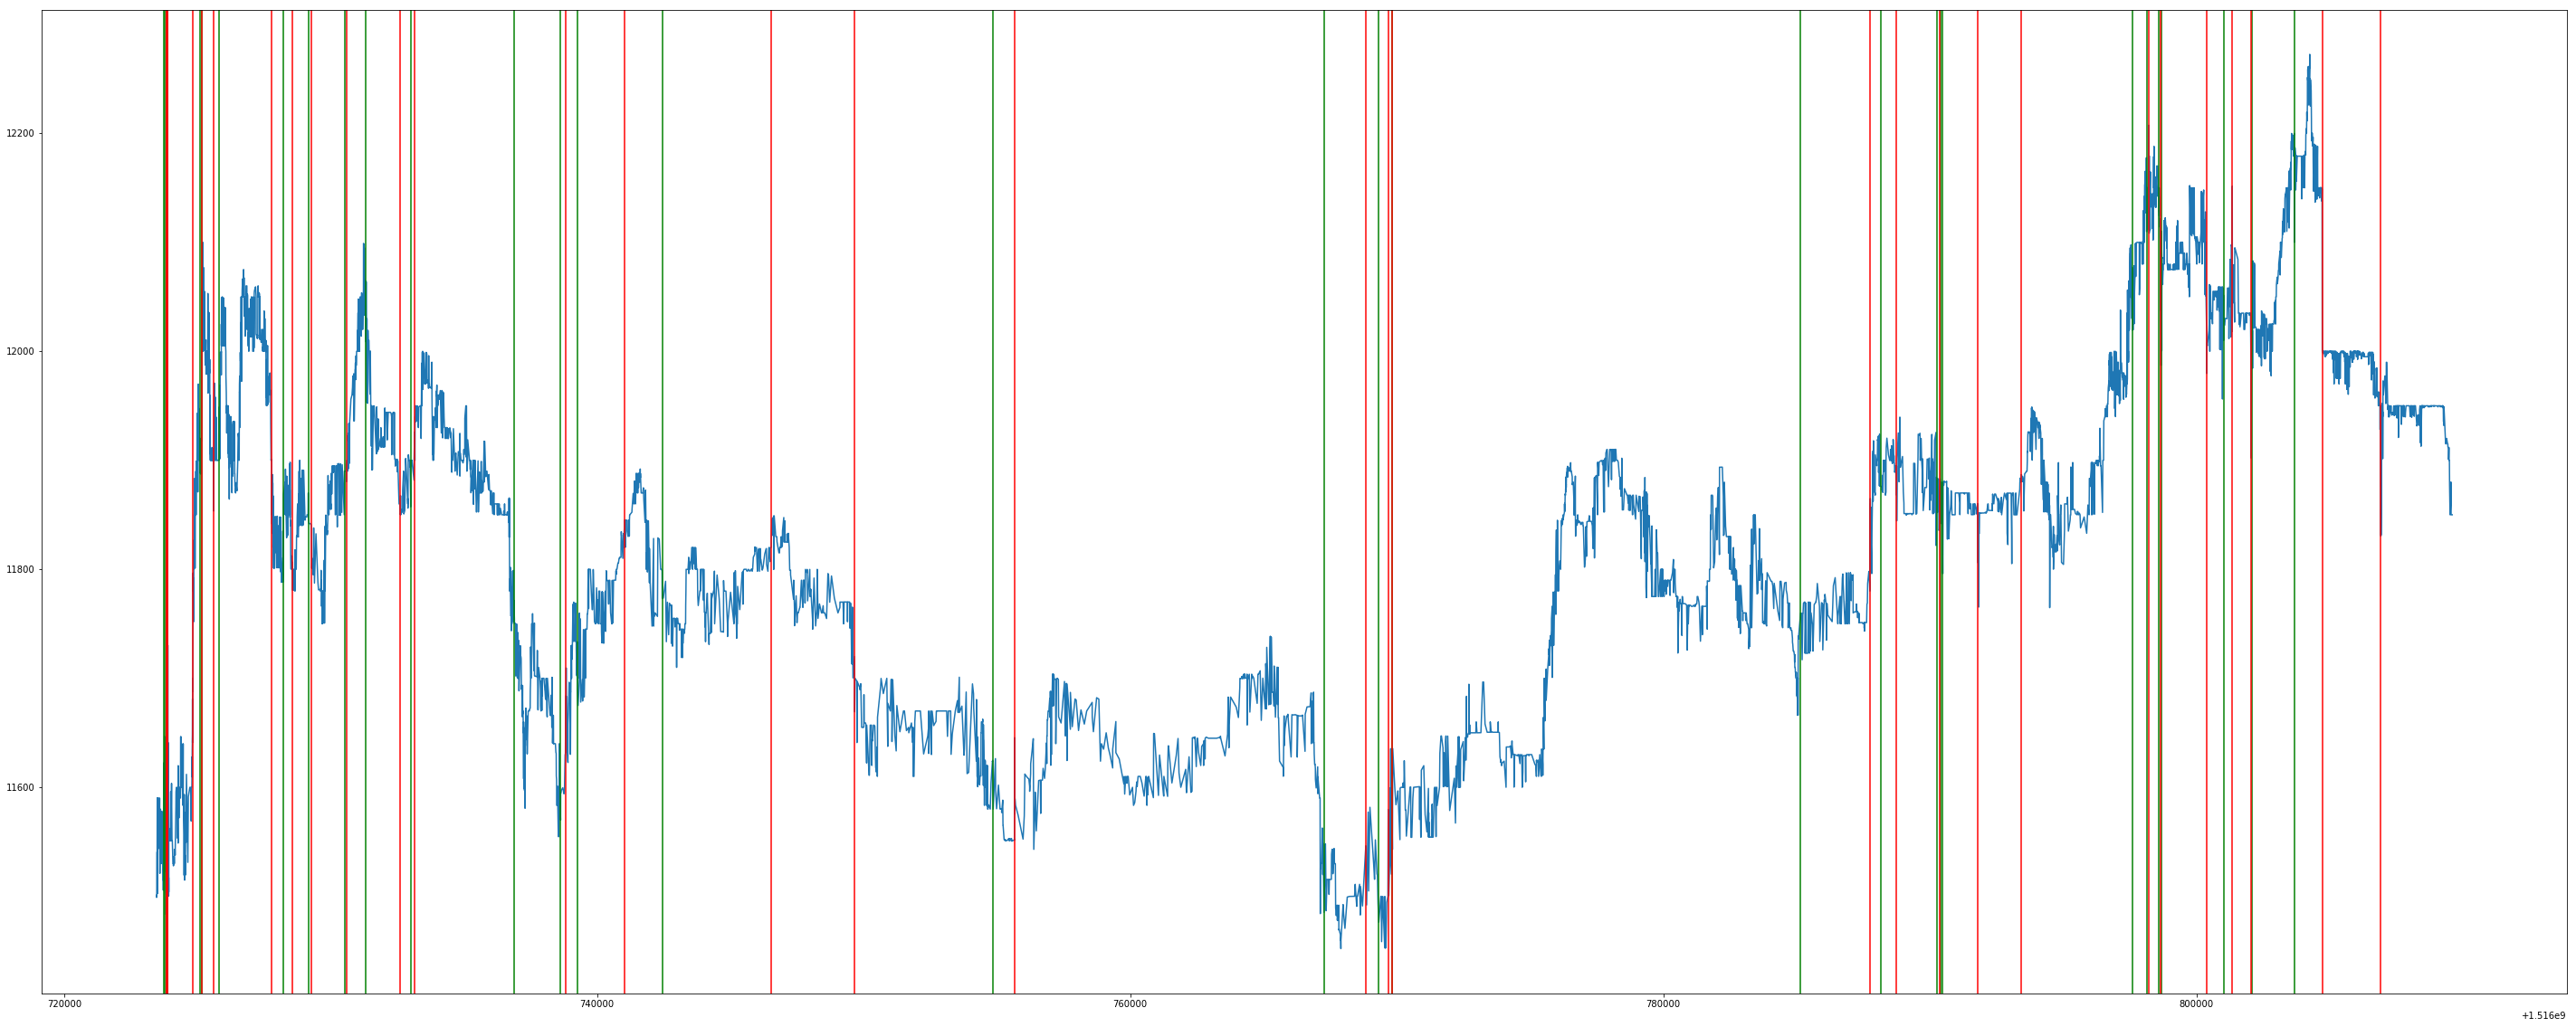

In [636]:
import os
import json
from collections import defaultdict
deals = {}
folder = r'C:\Users\ozavorot\Documents\GitHub\xmb\real_data_test\deals'
for filename in os.listdir(folder):
    with open(os.path.join(folder, filename)) as f:
        d = json.load(f)
        deals.update(d)
dd = defaultdict(list)
for d in deals.values():
    dd[int(d['date'])].append(float(d['price']))
data = []
for k, d in dd.items():
    data.append({'date': k, 'price': np.mean(d)})
data = sorted(data, key=lambda d: d['date'])
#data = [{'date': int(d['date']), 'price': float(d['price'])} for d in deals.values()]
df = pd.DataFrame(data)
df
plt.rcParams['figure.figsize'] = (50,20)
plt.plot(df['date'], df['price'])

arch = []
arch_folder = r'C:\Users\ozavorot\Documents\GitHub\xmb\real_data_test\archive'
for filename in os.listdir(arch_folder):
    with open(os.path.join(arch_folder, filename)) as f:
        d = json.load(f)
        arch.append(d)

created_reserve_orders = []
completed_reserve_orders = []
created_profit_orders = []
completed_profit_orders = []

for a in arch:
    if a['order_type'] == 'RESERVE':
        created_reserve_orders.append(int(a['created']))
        if 'completed' in a:
            completed_reserve_orders.append(int(a['completed']))
    elif a['order_type'] == 'PROFIT':
        #if a['status'] == 'OPEN':
            created_profit_orders.append(int(a['created']))
        #else:
            completed_profit_orders.append(int(a['completed']))
for o in created_profit_orders:
    plt.axvline(o, color='GREEN')
for o in completed_profit_orders:    
    plt.axvline(o, color='RED')
#for o in created_reserve_orders:    
#    plt.axvline(o, color='YELLOW')
#plt.show()
